In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def load_and_preprocess_data():
  # load the CIFA-10 dataset
  (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
  # normalize the images
  x_train = x_train / 255.0
  x_test = x_test / 255.0
  #reshape the data to 1D array
  x_train = x_train.reshape(-1, 32*32*3)
  # convert the labels to one-hot encoding
  y_train = tf.keras.utils.to_categorical(y_train, 10)
  y_test = tf.keras.utils.to_categorical(y_test, 10)
  return (x_train, y_train), (x_test, y_test)

In [5]:
def create_model():
  # create a multi-layer perceptron model
  model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(32*32*3,)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
  ])

  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

  return model


In [6]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image

def plot_model_diagram(model):
  plot_model(model, to_file='model.png', show_shapes=True)
  Image('model.png')

In [7]:
def train_model(model, x_train, y_train):
  # tranning with 20 epochs and batch size of 128
  history = model.fit(x_train, y_train, epochs=20, batch_size=256, validation_split=0.2, verbose=1)
  return history

In [19]:
def plot_training_history(history):
    # Plotting Training and Validation Accuracy
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.show()

    # Plotting Training and Validation Loss
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

In [9]:
def make_predictions(model, x_test, y_test):
  # make predictions on the test set
  predictions = model.predict(x_test)
  
  # Plotting the a random single prediction
  random_index = np.random.randint(0, len(x_test))
  plt.figure(figsize=(6, 6))
  plt.imshow(x_test[random_index].reshape(32, 32, 3))
  plt.title(f'Predicted: {np.argmax(predictions[random_index])}, Actual: {np.argmax(y_test[random_index])}')
  plt.axis('off')
  plt.show()
  

In [11]:
def main():
  (x_train, y_train), (x_test, y_test) = load_and_preprocess_data()
  model = create_model()
  history = train_model(model, x_train, y_train)
  return model, history, x_test, y_test

In [13]:
model, history, x_test, y_test = main()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 231s 1us/step


c:\Users\tharu\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.1870 - loss: 2.1823 - val_accuracy: 0.3276 - val_loss: 1.8571
Epoch 2/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.3096 - loss: 1.9000 - val_accuracy: 0.3499 - val_loss: 1.7999
Epoch 3/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.3304 - loss: 1.8319 - val_accuracy: 0.3662 - val_loss: 1.7661
Epoch 4/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.3489 - loss: 1.7991 - val_accuracy: 0.3975 - val_loss: 1.7084
Epoch 5/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.3644 - loss: 1.7607 - val_accuracy: 0.3965 - val_loss: 1.6974
Epoch 6/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.3715 - loss: 1.7289 - val_accuracy: 0.3836 - val_loss: 1.7196
Epoch 7/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.3835 - loss: 1.7056 - val_accuracy: 0.4050 - val_loss: 1.6653
Epoch 8/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.3876 - loss: 1.6904 - val_accu

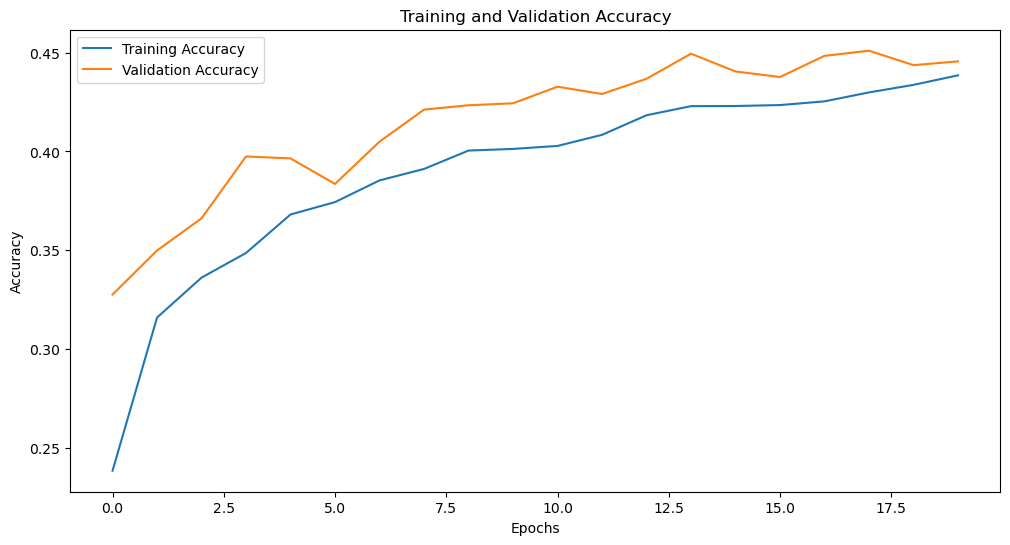

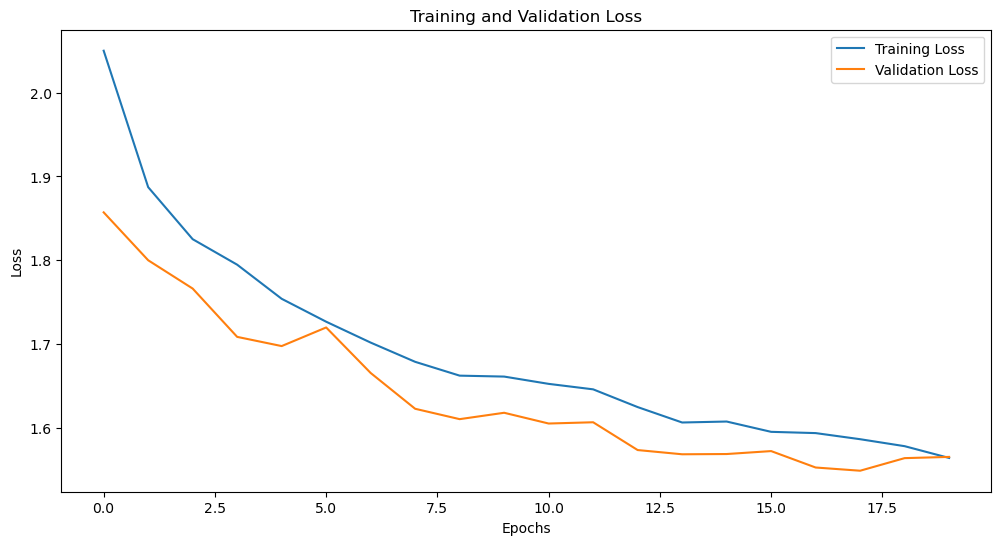

In [21]:
plot_training_history(history)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


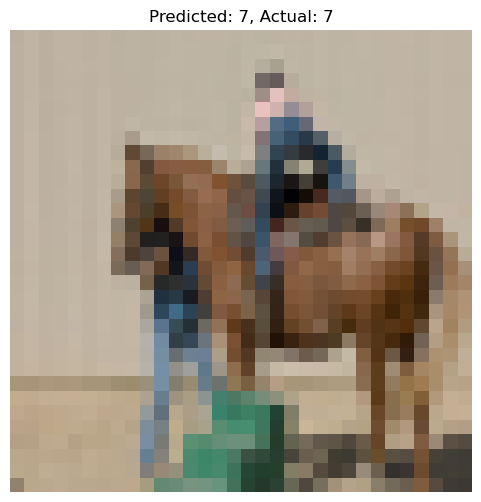

In [17]:
x_test = x_test.reshape(-1, 32 * 32 * 3)
make_predictions(model, x_test, y_test)